<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Mise en place du KDD (Knowledge Discovery in Databases) avec python</h1>

<h2> Outils à disposition </h2>

Pour pouvoir suivre cette exemple, nous disposons des éléments suivants :

- le <strong>SDK Python 3 </strong>
- Un environnement de <strong>développement Python </strong>. Google colab notebook (application web utilisée pour programmer en python) fera l’affaire
- Les librairies <strong>Sickit-Learn</strong>, <strong>matplotlib</strong>, <strong>numpy</strong> et <strong>Pandas</strong>.

<h2> Présentation du jeu de données </h2>

Dans le cadre de cette exemple, nous allons utilisé une partie du jeu de données <strong>Iris</strong> connu aussi sous le nom de Iris de Fisher est un jeu de données multivariées présenté en 1936 par <em>Ronald Fisher</em>.


Le jeu de données comprend 150 ovservations, 50 échantillons de chacune des trois espèces d'iris :
- <strong>Iris setosa</strong>
- <strong>Iris virginica</strong>
- <strong>Iris versicolor</strong>

<img alt="Image for post" class="su sv ed dt dp hn w c" width="1000" height="447" src="https://miro.medium.com/max/1000/1*lFC_U5j_Y8IXF4Ga87KNVg.png" srcset="https://miro.medium.com/max/276/1*lFC_U5j_Y8IXF4Ga87KNVg.png 276w, https://miro.medium.com/max/552/1*lFC_U5j_Y8IXF4Ga87KNVg.png 552w, https://miro.medium.com/max/640/1*lFC_U5j_Y8IXF4Ga87KNVg.png 640w, https://miro.medium.com/max/700/1*lFC_U5j_Y8IXF4Ga87KNVg.png 700w" sizes="700px">

Nous observons quatre caractéristiques ont été mesurées à partir de chaque échantillon : 
- la <strong>longueur</strong> et la <strong>largeur</strong> des <strong>sépales</strong> en centimètres
- la <strong>longueur</strong> et la <strong>largeur</strong> des <strong>pétales</strong> en centimètres


## <strong> 1 : Situer le problème</strong>

Rappel : La première étape du processus (<strong>Situer le problème</strong>) revient à se poser des questions visant à comprendre le domaine d'application et à identifier les objectifs et l'intérêt de la mise en oeuvre du Data Mining.


Nous allons crée un modéle pour classifier les différents types d'IRIS à l'aide du dataset. (https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

<font color='red'><strong>Objectif : Nous nous demanderons s'il est possible de classifier un iris à partir de ses paramètres (la longueur et largeur de ses pétales).</strong> </font>


## <strong>2 : Collecte de données</strong>

Rappel : La première étape du processus (<strong>Situer le problème</strong>) revient à se poser des questions visant à comprendre le domaine d'application et à identifier les objectifs et l'intérêt de la mise en oeuvre du Data Mining.



In [2]:
import pandas as pd

#Define the col names
colnames=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

#Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )
#Data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


le jeu IRIS se compose de trois classes, les étiquettes Y peuvent donc appartenir à l’ensemble {0, 1, 2}. Il s’agit donc d’une classification Multi-classes.

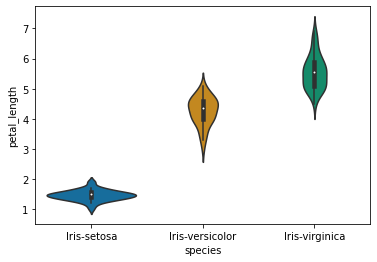

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']



#train, test = train_test_split(dataset, test_size = 0.4, stratify = dataset['species'], random_state = 42)


sns.violinplot(x="species", y="petal_length", data=dataset, size=5, order = cn, palette = 'colorblind');


## <strong>3 : Nettoyage de données</strong>

Rappel : Ici, nous sélectionnons que les données les plus importantes, les données que nous voulons expliquer. Nous analysons les données utilisables, c'est à dire "propres" et "consolides". Il ne faut pas hésiter à ne pas prendre toutes les données.

Remarque : ici pour ce jeu de données, nous n'avons pas besoin de supprimer ou retirer des lignes

In [4]:
#Verification des lignes avec des paramètres manquants. Si c'est le cas, nous devons apporter des modifications à notre jeu de données
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## <strong>4 : Réduction et projection des données</strong>

Rappel : Ici, nous recherchons les éléments (variables) les plus utiles pour représenter les données, en fonction de notre objectif. Le but est de réduire le nombre variables à conserver.

Dans un premier, nous allons nous demander quels sont les relations entre les différentes variables. 

<em>Exemple : Est-ce qu'il y a une relation entre la taille des pétales et sépales</em>

Pour répondre à cela, nous allons élaborer un <strong>tableau de corrélation </strong> sous la forme d'une carte de chaleur.

Text(0.5, 1.0, 'Correlation On iris Classes')

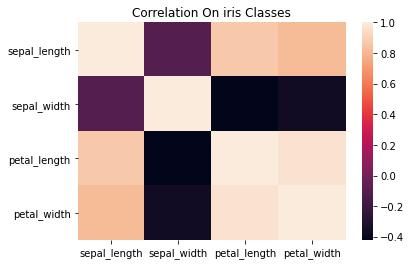

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# carte de chaleur pour réprésenter la corrélation entra paramètres
plt.figure(1)
sns.axes_style()
sns.heatmap(dataset.corr())
plt.title('Correlation On iris Classes')

Observation : On

## <strong>5 : Exploration des données</strong>

Rappel : L' <strong>exploration de données </strong> correspond à la construction du modèle de référence. Ici, nous allons appliquer un algorithme de machine learning (apprentissage supervisé, apprentissage non supervisé, méthode statistique et autres).

In [6]:
from sklearn import neighbors, datasets

X = dataset.iloc[:, 0:2].values #First and second column of IRIS dataset 
y = dataset.iloc[:, 4].values # Species from IRIS dataset


Pour ce tutoriel, nous allons appliqué l'algorithme des plus proches voisins avec comme paramètre en entré "<strong>neighbor</strong>"". Le modèle se nommera "<strong>modele</strong>.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neighbor=5 #hyperparameter KNN method


modele = KNeighborsClassifier(n_neighbors=neighbor)
modele.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## <strong>6 : Analyse et interprétation des données</strong>

Rappel : La première étape du processus (<strong>Situer le problème</strong>) revient à se poser des questions visant à comprendre le domaine d'application et à identifier les objectifs et l'intérêt de la mise en oeuvre du Data Mining.

Maintenant qu’on a entraîné notre algorithme de plus proche voisin KNN, on va l’utiliser pour prédire la classe de fleurs d’IRIS qui ne figuraient pas dans le jeu d’entrainement. 

Pour rappel, on a utilisé que les variables explicatives "<strong>Sepal Length</strong>" et "<strong>Sepal Width</strong>" pour entrainer notre jeu de données. Ainsi, nous allons fournir des valeurs pour ces deux variables et on demandera au modèle prédictif de nous indiquer la classe de la fleur.


Text(0, 0.5, 'sepal.width')

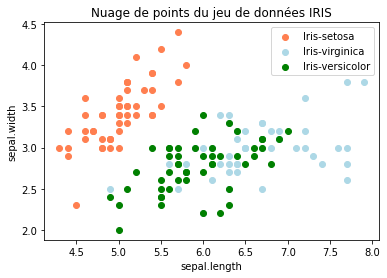

In [46]:
import matplotlib.pyplot as plt

dataset_setosa = dataset[dataset['species'] =="Iris-setosa"]
#print(dataset_setosa)
dataset_virginica = dataset[dataset['species'] =="Iris-virginica"]
dataset_versicolor = dataset[dataset['species'] =="Iris-versicolor"]

#print IRIS-setosa
data_x = dataset_setosa.iloc[:, 0].values
data_y = dataset_setosa.iloc[:, 1].values
#print(data_x)
plt.scatter(data_x, data_y, c='coral', label='Iris-setosa')


#print IRIS-virginica
data_x = dataset_virginica.iloc[:, 0].values
data_y = dataset_virginica.iloc[:, 1].values
#print(data_x)
plt.scatter(data_x, data_y, c='lightblue', label='Iris-virginica')


#print IRIS-versicolor
data_x = dataset_versicolor.iloc[:, 0].values
data_y = dataset_versicolor.iloc[:, 1].values
#print(data_x)
plt.scatter(data_x, data_y, c='green', label='Iris-versicolor')


#Legend of plot
plt.legend()
plt.title('Nuage de points du jeu de données IRIS')
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')

Créons un nouveau jeu de données arbitraire qui va s'appeler "<strong>Data_To_Predict</strong>". Pour se jeu de données, nous ne connaissons pas de quelle type d'iris ils appartiennent

In [29]:
#Données à prédire
Data_To_Predict = [
    [5.5, 2.5],
    [7, 3],
    [3,2],
    [5,3]
]



Affichons les nouveaux points de "<strong>Data_To_Predict</strong>" dans notre nuage de points (en rouge pour faciliter notre lecture).

Text(0, 0.5, 'sepal.width')

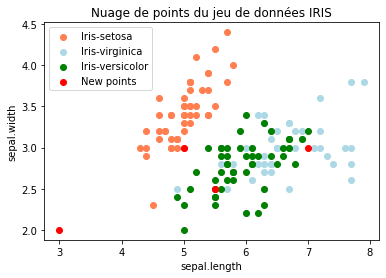

In [47]:
import matplotlib.pyplot as plt

dataset_setosa = dataset[dataset['species'] =="Iris-setosa"]
#print(dataset_setosa)
dataset_virginica = dataset[dataset['species'] =="Iris-virginica"]
dataset_versicolor = dataset[dataset['species'] =="Iris-versicolor"]

#print IRIS-setosa
data_x = dataset_setosa.iloc[:, 0].values
data_y = dataset_setosa.iloc[:, 1].values
#print(data_x)
plt.scatter(data_x, data_y, c='coral', label='Iris-setosa')


#print IRIS-virginica
data_x = dataset_virginica.iloc[:, 0].values
data_y = dataset_virginica.iloc[:, 1].values
#print(data_x)
plt.scatter(data_x, data_y, c='lightblue', label='Iris-virginica')


#print IRIS-versicolor
data_x = dataset_versicolor.iloc[:, 0].values
data_y = dataset_versicolor.iloc[:, 1].values
#print(data_x)
plt.scatter(data_x, data_y, c='green', label='Iris-versicolor')

#print new point
data_x = [
    [5.5],
    [7],
    [3],
    [5]
]

data_y = [
    [2.5],
    [3],
    [2],
    [3]
]

#print(data_x)
plt.scatter(data_x, data_y, c='red', label='New points')

#Legend of plot
plt.legend()
plt.title('Nuage de points du jeu de données IRIS')
plt.xlabel('sepal.length (cm)')
plt.ylabel('sepal.width (cm)')


Maintenant, utilisons que nous venos de créer pour observer si on obtient le même résultat que nous pensons.

In [1]:
y_pred = modele.predict(Data_To_Predict)
print(y_pred)

NameError: ignored

Avec le modèle que nous venons de créer, nous avons réussi à classer ses 4 nouveaux points.

## <strong>7 : Communiquer et exploiter les résultats</strong>

Rappel : La première étape du processus (<strong>Situer le problème</strong>) revient à se poser des questions visant à comprendre le domaine d'application et à identifier les objectifs et l'intérêt de la mise en oeuvre du Data Mining.

